In [21]:
import pandas as pd
import numpy as np
import plotly.express as px

In [22]:
filePath = "Student-data.csv"
headers = [
    'First Term Gpa', 'Second Term Gpa', 'First Language', 'Funding', 'School',
    'Fast Track', 'Coop', 'Residency', 'Gender', 'Prev Education',
    'Age Group', 'High School Average Mark', 'Math Score', 'English Grade', 'FirstYearPersistence'
]

In [23]:
df = pd.read_csv(filePath, skiprows=24, header=None)  # we are skipping the first 24 rows
df.columns = headers  
df.shape

(1437, 15)

In [24]:
df.head()

First Term Gpa Second Term Gpa First Language  Funding  School  Fast Track  \
0              0               0              1        2       6           2   
1            2.5               2              3        4       6           1   
2           4.25        3.923077              1        1       6           2   
3       3.020833        2.321429              3        4       6           1   
4          4.275        4.326923              1        2       6           1   

   Coop  Residency  Gender Prev Education Age Group High School Average Mark  \
0     1          1       2              1         1                       59   
1     2          2       2              1         3                        ?   
2     1          1       1              2         3                       92   
3     2          2       2              2         3                        ?   
4     1          1       1              2         3                       97   

  Math Score English Grade  FirstYearPersistence  
0         16             7                     1  
1          ?             7                     1  
2         41             9                     1  
3          ?             8                     1  
4          ?             9                     1

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   First Term Gpa            1437 non-null   object
 1   Second Term Gpa           1437 non-null   object
 2   First Language            1437 non-null   object
 3   Funding                   1437 non-null   int64 
 4   School                    1437 non-null   int64 
 5   Fast Track                1437 non-null   int64 
 6   Coop                      1437 non-null   int64 
 7   Residency                 1437 non-null   int64 
 8   Gender                    1437 non-null   int64 
 9   Prev Education            1437 non-null   object
 10  Age Group                 1437 non-null   object
 11  High School Average Mark  1437 non-null   object
 12  Math Score                1437 non-null   object
 13  English Grade             1437 non-null   object
 14  FirstYearPersistence    

In [26]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

First Term Gpa               17
Second Term Gpa             160
First Language              111
Funding                       0
School                        0
Fast Track                    0
Coop                          0
Residency                     0
Gender                        0
Prev Education                4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

In [27]:
df.isnull().sum()

First Term Gpa               17
Second Term Gpa             160
First Language              111
Funding                       0
School                        0
Fast Track                    0
Coop                          0
Residency                     0
Gender                        0
Prev Education                4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

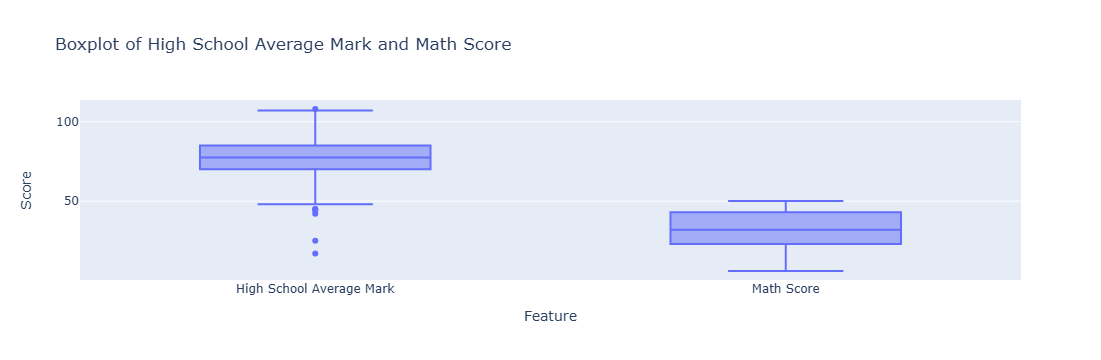

In [28]:
import plotly.express as px
df['Math Score'] = pd.to_numeric(df['Math Score'], errors='coerce')
data_long = df.melt(value_vars=['High School Average Mark', 'Math Score'], var_name='Feature', value_name='Score')
fig = px.box(data_long, x='Feature', y='Score', title='Boxplot of High School Average Mark and Math Score')
fig.show()

In [29]:
df['First Language'].fillna(df['First Language'].mode()[0], inplace = True)
df['Prev Education'].fillna(df['Prev Education'].mode()[0], inplace = True)
df['English Grade'].fillna(df['English Grade'].mode()[0], inplace = True)
df = df.dropna(subset=['Age Group'])

In [30]:
df['First Term Gpa'] = df['First Term Gpa'].astype(float)
df['Second Term Gpa'] = df['Second Term Gpa'].astype(float)
df['First Language'] = df['First Language'].astype(int)

In [31]:
df.drop(columns=['High School Average Mark'], inplace=True)

In [32]:
df.isnull().sum()

First Term Gpa           17
Second Term Gpa         159
First Language            0
Funding                   0
School                    0
Fast Track                0
Coop                      0
Residency                 0
Gender                    0
Prev Education            0
Age Group                 0
Math Score              460
English Grade             0
FirstYearPersistence      0
dtype: int64

In [33]:
df['Math Score'] = pd.to_numeric(df['Math Score'], errors='coerce')
df['Math Score'] = df['Math Score'].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1433 entries, 0 to 1436
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First Term Gpa        1416 non-null   float64
 1   Second Term Gpa       1274 non-null   float64
 2   First Language        1433 non-null   int32  
 3   Funding               1433 non-null   int64  
 4   School                1433 non-null   int64  
 5   Fast Track            1433 non-null   int64  
 6   Coop                  1433 non-null   int64  
 7   Residency             1433 non-null   int64  
 8   Gender                1433 non-null   int64  
 9   Prev Education        1433 non-null   object 
 10  Age Group             1433 non-null   object 
 11  Math Score            973 non-null    float64
 12  English Grade         1433 non-null   object 
 13  FirstYearPersistence  1433 non-null   int64  
dtypes: float64(3), int32(1), int64(7), object(3)
memory usage: 162.3+ KB


In [35]:
df['Math Score'] = df['Math Score'].fillna(df['Math Score'].mean())

In [36]:
df['First Term Gpa'].fillna(df['First Term Gpa'].mean(), inplace=True)
df['Second Term Gpa'].fillna(df['Second Term Gpa'].mean(), inplace=True)

In [37]:
df.isnull().sum()

First Term Gpa          0
Second Term Gpa         0
First Language          0
Funding                 0
School                  0
Fast Track              0
Coop                    0
Residency               0
Gender                  0
Prev Education          0
Age Group               0
Math Score              0
English Grade           0
FirstYearPersistence    0
dtype: int64

# Neural Network

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Separate features and target
X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target (last column)

# Encode categorical target variable if needed
if y.dtype == 'object':
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Adjust based on target type (classification/regression)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Save the model
model.save('neural_network_model.h5')

C:\Users\MIS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.5598 - loss: 1.1478 - val_accuracy: 0.7783 - val_loss: 0.5394
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7369 - loss: 0.5613 - val_accuracy: 0.7957 - val_loss: 0.4708
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7902 - loss: 0.4731 - val_accuracy: 0.8043 - val_loss: 0.4278
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8159 - loss: 0.4209 - val_accuracy: 0.8435 - val_loss: 0.3900
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8412 - loss: 0.3923 - val_accuracy: 0.8609 - val_loss: 0.3652
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8473 - loss: 0.3811 - val_accuracy: 0.8652 - val_loss: 0.3550
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8536 - loss: 0.3673 - val_accuracy: 0.8609 - val_loss: 0.3639
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8635 - loss: 0.3725 - val_accuracy: 0.8391 - v

Test Accuracy: 0.85


In [39]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [42]:
# Load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('neural_network_model.h5')
loaded_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,011 (11.77 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)